# Grovers Algorithm
Grover’s algorithm aims to maximise the chance of measuring a specified state (called the ‘winning state’ |w⟩) from qubits initiated in a complete superposition. The following code implements this for the two-qubit case where |w⟩ =|11⟩

https://medium.com/@harini.hapuarachchi/a-beginners-guide-to-qiskit-1-0-c8e3e854d732

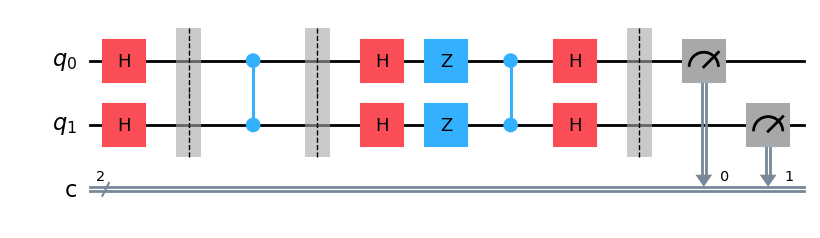

In [4]:
from qiskit import *

# Initialising a circuit with 2 qubits and 2 classical bits
gc = QuantumCircuit(2,2) 

# Putting the two qubits into the complete superposition state |s>
# This is done by applying Hadamard gates on both qubits [0,1]
gc.h([0,1])

gc.barrier()

# The 'oracle' function for |w> = |11> is a controlled z gate
# This implements the U_w rotation discussed in the video
gc.cz(0,1) 

gc.barrier()

# The following code implements the rotation U_s
# This rotates U_w|s> onto the winning state |w>
gc.h([0,1])
gc.z([0,1])
gc.cz(0,1)
gc.h([0,1])

gc.barrier()

# Measure qbits [0,1] into classical bits [0, 1]
gc.measure([0,1], [0,1]) 

# Draw the circuit
gc.draw(output = 'mpl')

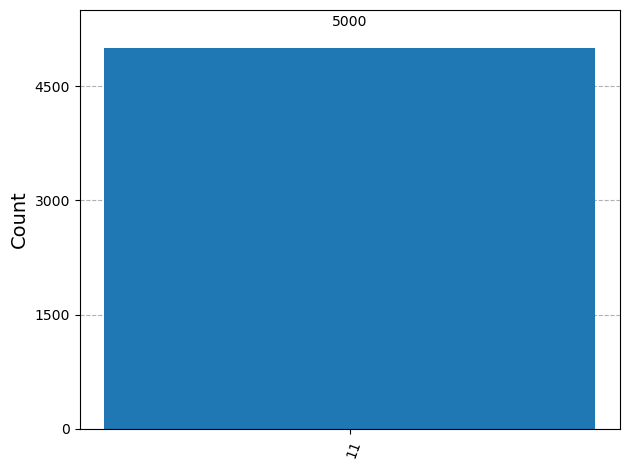

In [2]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

# Prepare and run the circuit 5000 times and show the statistical output
backend = BasicSimulator()
result = backend.run(gc, shots=5000).result()
counts = result.get_counts()
plot_histogram(counts)